## Read .txt file

In [1]:
import numpy as np
import re
from src.utils import modif_plot
from src.utils import quickplot

In [2]:
# read SIT observations


# CroSat AWI summaries
idir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified-sea-ice-thickness-cdr-1947-2017/'
ifile = 'CryoSat-AWI_summaries.v20160414.20160415.txt'

# data from november 2010 to February 2016

In [3]:
with open(f'{idir}{ifile}','r') as f:
    lines = f.readlines()

In [4]:
header = [item for item in re.split(' +', lines[0])][1:-1] + ['SD_thkns'] 

In [5]:
header

['Source',
 'Cruise',
 'Index',
 'Year',
 'Yday',
 'MinDay',
 'MaxDay',
 'Month',
 'Lat',
 'Lon',
 'MinLat',
 'MaxLat',
 'MinLon',
 'MaxLon',
 'Length',
 'Nsamps',
 'Avg_uncr',
 'Min_uncr',
 'Max_uncr',
 'SD_uncrr',
 'Avg_uncs',
 'Min_uncs',
 'Max_uncs',
 'SD_uncs',
 'Avg_thkns',
 'Min_thkns',
 'Max_thkns',
 'SD_thkns']

In [6]:
data = np.genfromtxt(f'{idir}{ifile}', delimiter='\t', dtype='U255', skip_header=1, autostrip=True)

In [7]:
data

array(['CryoSat-AWI   v20160414  16990000   2010  319.0  305.0  334.0     11   70.36  -19.84   70.28   70.57  -20.52  -19.27   -999        31      0.41      0.58      1.36      0.33      1.60      1.01      2.73      0.78      1.66      0.84      2.25      0.63',
       'CryoSat-AWI   v20160414  16990001   2010  319.0  305.0  334.0     11   70.90  -20.42   70.85   71.14  -20.99  -19.72   -999        92      0.25      0.35      1.04      0.30      1.52      1.17      2.12      0.43      2.09      0.47      3.14      1.13',
       'CryoSat-AWI   v20160414  16990002   2010  319.0  305.0  334.0     11   71.29  -20.68   71.14   71.56  -21.09  -20.19   -999       157      0.18      0.34      0.49      0.07      1.69      1.49      2.12      0.29      2.18      1.37      3.14      0.78',
       ...,
       'CryoSat-AWI   v20160414  17124351   2016   46.0   32.0   59.0      2   58.12  156.64   58.02   58.45  156.27  157.02   -999        61      0.26      0.46      1.44      0.41      1.03     

This type of data in the .txt file.
We get the data type from the documentation file:

In [8]:
data[0]

'CryoSat-AWI   v20160414  16990000   2010  319.0  305.0  334.0     11   70.36  -19.84   70.28   70.57  -20.52  -19.27   -999        31      0.41      0.58      1.36      0.33      1.60      1.01      2.73      0.78      1.66      0.84      2.25      0.63'

In [9]:
types_data = ['U12','U12', 'int', 'int']+ ['float']*3 +['int']+ ['float']*6+ ['int', 'int']+ ['float']*12

In [10]:
# array with all the lines
arr = []
for dt in data:
    arr += [item for item in re.split(' +', dt)]

In [11]:
nlines = data.shape[0]
bb = np.array(arr).reshape(nlines,28)

In [12]:
# create dictionary from the array
dico = {}

for idx, (var, typecol) in enumerate(zip(header, types_data)):
    # format data
    if typecol == 'U12':
        typec = 'U12'
    elif typecol == 'float':
        typec = np.float64
    elif typecol == 'int':
        typec = np.int64
        
    dico[f'{var}'] = np.asarray(bb[:,idx], dtype=typec)

In [13]:
dico;

In [14]:
dico['Avg_thkns'];

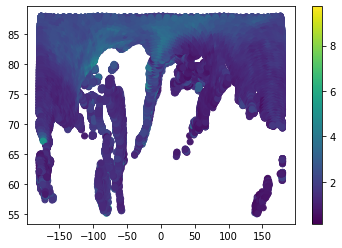

In [15]:
import matplotlib.pyplot as plt
plt.scatter(dico['Lon'], dico['Lat'], c=dico['Avg_thkns'])
plt.colorbar()

In [358]:
from importlib import reload
reload(quickplot);

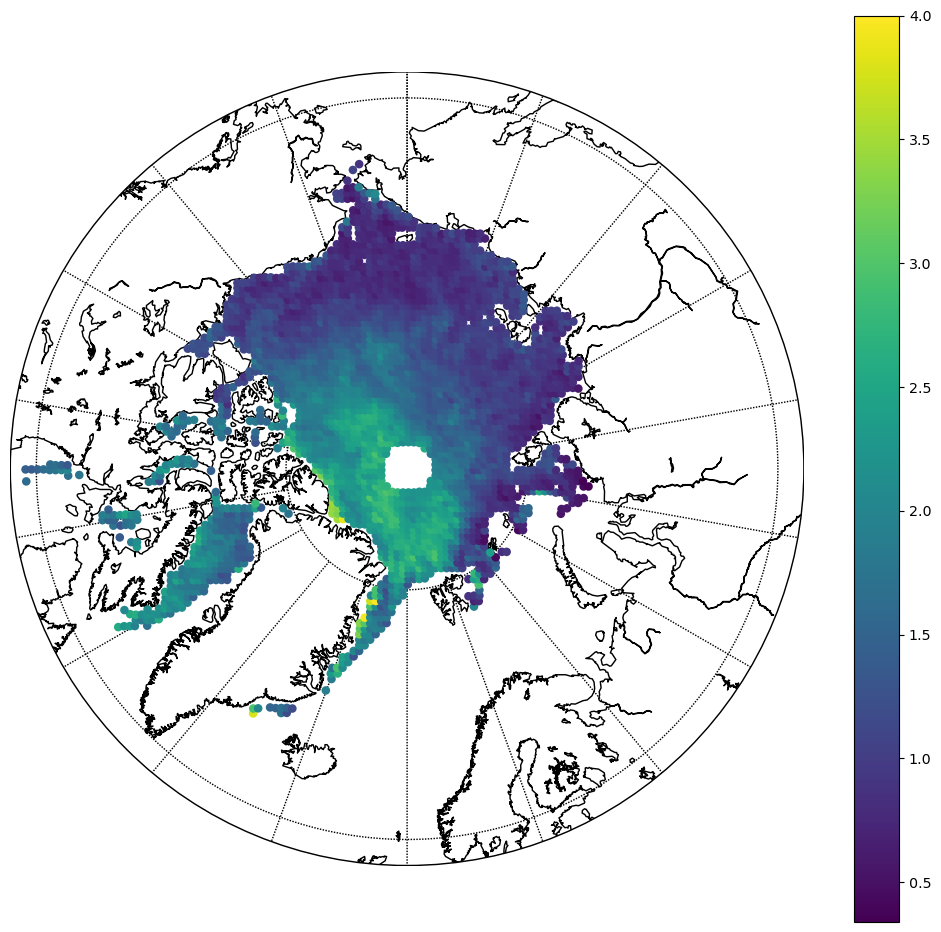

In [364]:
index = np.where((dico['Year']==2011) & (dico['Month']==12))

savefig = True
odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
filename = f'CryoSat-AWI_summaries_SIT_obs_201112.png'
ofile = f'{odir}{filename}'

quickplot.basemap(dico['Lon'][index], dico['Lat'][index], var=dico['Avg_thkns'][index], savefig=False, ofile=ofile, vmax=4, label='SIT (m)')


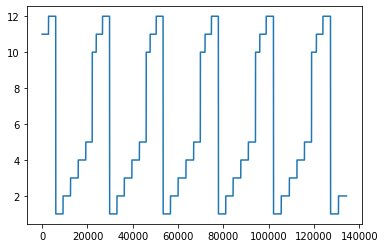

In [170]:
plt.plot(dico['Month'])

## Get monthly mean

In [16]:
# dataset average monthly from 01-2010 to 12-2016 
sitmm = np.nan * np.ones(shape=(12*7))
nind = np.nan * np.ones(shape=(12*7))
i = 0

for yr in range(2010,2017):
    for m in range(1,13):
        indexes = np.where((dico['Year']==yr) & (dico['Month']==m))
        sitmm[i] = np.nanmean(dico['Avg_thkns'][indexes])
        nind[i] = len(indexes[0])
#         if nind >0: break
        i += 1



/tmp/ipykernel_130162/4129925235.py:9: RuntimeWarning: Mean of empty slice
  sitmm[i] = np.nanmean(dico['Avg_thkns'][indexes])


In [17]:
# np.where((dico['Year']==2016) & (dico['Month']==2))

In [18]:
month_labels = ['Mar','Jun','Sept','Dec']*6 + ['Mar','Jun']
year_labels = ['2010','2011','2012','2013','2014','2015','2016']

## Save dataset in a ready to use format

For now, monthly mean is sufficient:

In [19]:
# save as .npz
odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
ofile = f'CryoSat-AWI_summaries_SIT_monthlymean.npy'

np.save(f'{odir}{ofile}', sitmm)


## Plot monthly mean

Figure saved as: /nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/CryoSat-AWI_summaries_SIT_monthlymean.png


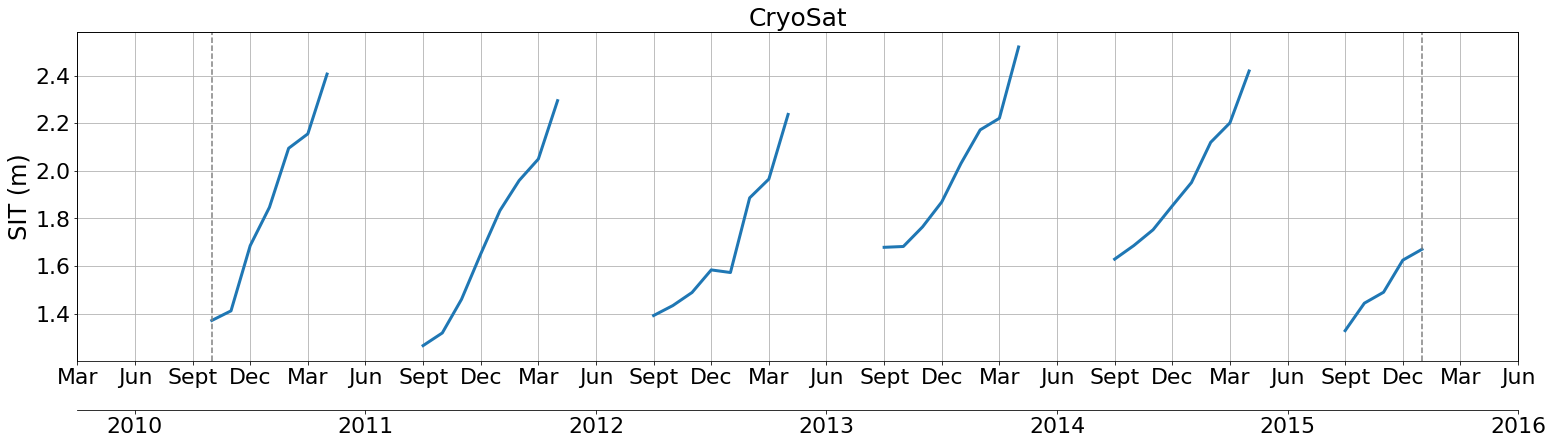

In [330]:
fig, ax = plt.subplots(figsize=(21,6))

plt.plot(sitmm, lw = 3)
plt.ylabel('SIT (m)')
plt.title('CryoSat')

plt.axvline(10, c='gray',ls='--')
plt.axvline(73, c='gray',ls='--')


ax.set_xticks(np.arange(3,80,3))
ax.set_xticklabels(month_labels);
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xticks(np.arange(3,80,12));
ax2.set_xticklabels(year_labels);
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
#  Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))
fig.tight_layout()


modif_plot.resize(fig, 22)


if True:  # savefig:
    odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
    filename = f'CryoSat-AWI_summaries_SIT_monthlymean.png'
    plt.savefig(f"{odir}{filename}")
    print(f'Figure saved as: {odir}{filename}')

Figure saved as: /nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/CryoSat-AWI_summaries_SIT_monthlyObs.png


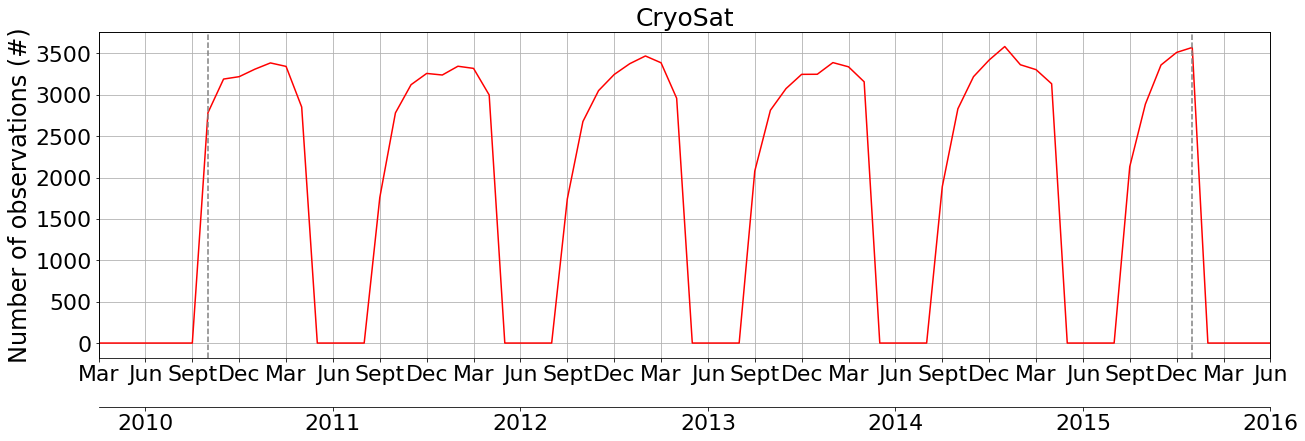

In [333]:
fig, ax = plt.subplots(figsize=(21,6))

plt.plot(nind, 'r')
plt.ylabel('Number of observations (#)')
plt.title('CryoSat')

plt.axvline(10, c='gray',ls='--')
plt.axvline(73, c='gray',ls='--')
plt.xlim([3,78])

ax.set_xticks(np.arange(3,80,3))
ax.set_xticklabels(month_labels);
ax.grid(True)

ax2 = ax.twiny()
ax2.set_xticks(np.arange(3,80,12));
ax2.set_xticklabels(year_labels);
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
#  Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.15))

modif_plot.resize(fig, 22)

if True:  # savefig:
    odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/unified_processed/'
    filename = f'CryoSat-AWI_summaries_SIT_monthlyObs.png'
    plt.savefig(f"{odir}{filename}")
    print(f'Figure saved as: {odir}{filename}')